<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="200px">

# Taller 3: Machine learning Classifiers.

## <span style="color:red"> Outline </span> 

1. [Ejercicio 1. Ejercicio de clasificación](#eje1)
2. [Ejercicio 2. Ejercicio de clasificación](#eje3)
3. [Ejercicio 3. Ejercicio de regresión](#eje4)
4. [Ejercicio 4. Ejercicio de regresión](#eje5)




#### <font style="color: red"> Esta práctica contiene 5 ejercicios <!-- ONLY IN NOTEBOOK -->

In [1]:
#@title 1. MONTAR EL DRIVE **student** { display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/course-IA1/ai-uis-student/talleres20201')
#os.chdir('/content/drive/My Drive/ai-uis-student/talleres20201')
print(os.getcwd())
!chmod 777 convert_ipynb.sh run utils/*

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/course-IA1/ai-uis-student/talleres20201


In [2]:
import scipy.stats as stats
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

<h2><span style="color:#FFF; background-color:#F00; font-weight:bold; padding:4px;">¡IMPORTANTE!</span></h2><br><h2 style="margin-top:-10px;">Usted debe ejecutar <span style="color:#F00;">TODAS</span> las celdas de tipo <span style="color:#F00;">CODE</span>. De lo contrario, sus respuestas no serán procesadas correctamente.</h2>

### Ejercicio 1 : Entrena un Algoritmo <a name="eje1"></a>

Completa la siguiente función para que entrene el **estimador** (clasificación) pasado como argumento con **X_train** e **y_train**.

Tenga en cuenta las siguientes consideraciones: 
- El dataset 'heart.csv' contiene una serie de características asociadas al corazón y se busca establecer si los valores que adquieren están asociados a una enfermedad cardíaca ('1') o no ('0').
- Como características se utilizaran todas las columnas, excepto la última (target)
- Se debe permutar el dataset
- El 80% del dataset se utilizará como train **X_train**,**y_train**
- El 20% del dataset restante se utilizará como test:**X_test**,**y_test**
- Utilice SVC como estimador con parámetros: kernel='rbf', gamma=0.0001220703125, C=2048

<b>Referencia SVC:</b> https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [3]:
def fit_estimator(vals):
    #Your Code Here.
    import pandas as pd
    import numpy as np
    from sklearn.svm import SVC
    size=vals.shape[0]
    X_train =vals[:int(size*.8)][:,:-1]
    X_test = vals[int(size*.8):][:,:-1]
    y_train =vals[:int(size*.8)][:,-1] 
    y_test = vals[int(size*.8):][:,-1]
    estimator = SVC(C=2048,kernel='rbf',gamma=0.0001220703125)
    #fit estimator
    estimator.fit(X_train,y_train)
    score = estimator.score(X_test, y_test)
    return estimator, score


#Colaboratory
import urllib.parse, inspect
src1 = urllib.parse.quote_plus(inspect.getsource(fit_estimator))

#Virtualbox
#import urllib, inspect
#src1 = urllib.quote_plus(inspect.getsource(fit_estimator))

Test Your Code:

In [4]:
import pandas as pd
import numpy as np

d = pd.read_csv("./misc/heart.csv",sep=",")
vals = np.random.permutation(d.values)
classifier,score = fit_estimator(vals)
print("classifier: ", type(classifier))
print("score", score)

classifier:  <class 'sklearn.svm._classes.SVC'>
score 0.7540983606557377


#### <span style="color:#FFF; background-color:#080; font-weight:bold; padding:4px;">Importante</span> Evalue su respuesta.

In [5]:
!./run CHECK_SOLUTION PS3_1 $src1

0.7704918032786885 0.7704918032786885
evaluation result CORRECT


### Ejercicio 2: Entrena un nuevo algoritmo de clasificación *_DecisionTreeClassifier_*<a name="eje3"></a>

Un método adicional para realizar tareas de **clasificación** se denomina Decision Tree Classifier. Su implementación se encuentra disponible en sklearn y puedes consultar la ayuda en: [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

Completa la siguiente función para que entrene un clasificador de tipo **DecisionTreeClassifier** pasando como argumento la permutación del dataset ['diamonds.csv'](https://www.kaggle.com/shivam2503/diamonds).

Tenga en cuenta las siguientes consideraciones: 
- El dataset 'diamonds.csv' contiene una serie de atributos tales como la claridad, el tamaño y otros. Se busca establecer el tipo de corte ("cut") dados dichos atributos.
- Como características se utilizarán las columnas {"depth","table","price","x","y","z"}
- Se debe permutar el dataset
- El 80% del dataset se utilizará como train: **X_train**, **y_train**
- El 20% del dataset restante se utilizará como test: **X_test**, **y_test**
- Utilice DecisionTreeClassifier como estimador

La función ha de devolver:
- El estimador ya entrenado
- El porcentaje de acierto al predecir **X_train** y comparar la predicción con **y_test**

#### Ejemplo de ejecución

    >d = pd.read_csv("./misc/diamonds.csv")
    >vals = np.random.permutation(d.values)
    >classifier, score = fit_lr(vals)
    >classifier:  <class 'sklearn.tree.tree.DecisionTreeClassifier'>
    >score 0.707174638487208

In [6]:
def fit_lr(vals):
    import numpy as np
    import pandas as pd
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import KFold
    from sklearn.model_selection import cross_val_score
    #Your Code Here.  
    X=vals[:][:,[5,6,7,8,9]]
    y=vals[:][:,2]
    X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.2)
    estimator = DecisionTreeClassifier()
    estimator.fit(X_train,y_train)
    p=estimator.predict(X_test)
    #scored = cross_val_score(estimator, X, y,cv=KFold(10, shuffle=True))
    #estimator.fit(X_train,y_train)
    #print(estimator.feature_importances_)
    return estimator, np.mean(p==y_test)


import urllib.parse, inspect
src3 = urllib.parse.quote_plus(inspect.getsource(fit_lr))

#Virtualbox
#import urllib, inspect
#src3 = urllib.quote_plus(inspect.getsource(fit_lr))

Test Your Code:

In [7]:
import pandas as pd
import numpy as np

d = pd.read_csv("./misc/diamonds.csv")
vals = np.random.permutation(d.values)
classifier, score = fit_lr(vals)
print("classifier: ", type(classifier))
print("score", score)

classifier:  <class 'sklearn.tree._classes.DecisionTreeClassifier'>
score 0.7089358546533185


#### <span style="color:#FFF; background-color:#080; font-weight:bold; padding:4px;">Importante</span> Evalue su respuesta.

In [8]:
!./run CHECK_SOLUTION PS3_2 $src3

0.7084723767148684 0.7074527252502781
evaluation result CORRECT


### Ejercicio 3 :  Entrena un algoritmo de regresión<a name="eje4"></a>

Completa la siguiente función para que realice una regresión utilizando un  **Support Vector Regressor**. La función debe devolver el **objeto del regresor** y un **resultado** usando la siguiente configuración:

- El regresor `SVR` (Support Vector Regressor) debe ser entrenado
<!-- La evalaución del método debe ser exhaustivo, utilizando un esquema de *cross-validation* con un **KFold = 10**-->
- La metrica para la evaluación es el RMSE. Recuerde que en sklearn, se cuenta con la métrica MSE. Para obtener la RMSE se calcula la raíz de los valores obtenidos con la MSE.
- Se debe retornar el valor promedio de la métrica RMSE.
- se debe retornar el estimador ya entrenado

<b>Referencia SVR:</b> https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [13]:
def fit_reg():
    import numpy as np
    import pandas as pd
    from sklearn.svm import SVR
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import KFold
    from sklearn.metrics import make_scorer, mean_squared_error
    #Your Code Here.
    d = pd.read_csv('./misc/winequality-red.csv',sep=";")
    vals = np.random.permutation(d)
    X=vals[:][:,[0,1,2,3,4,5,6,7,8,9,10]]
    y=vals[:][:,11]
    est = SVR(kernel='rbf')
    rmse_s = np.sqrt(cross_val_score(est,X,y,scoring=make_scorer(mean_squared_error),cv=KFold(10, shuffle=True)))
    return est, np.mean(rmse_s)

#Colaboratory
import urllib.parse, inspect
src4 = urllib.parse.quote_plus(inspect.getsource(fit_reg))

#Virtualbox
#import urllib, inspect
#src4 = urllib.quote_plus(inspect.getsource(fit_reg))

Test Your Code:

In [14]:
import numpy as np
import pandas as pd
#bikes = pd.read_csv('./misc/bikes.csv')
d = pd.read_csv('./misc/winequality-red.csv',sep=";")
d.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [15]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR

est, s = fit_reg()
print("est", est)
#print("RMSE score", s)
print("score", s)

est SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
score 0.7303725666603578


#### <span style="color:#FFF; background-color:#080; font-weight:bold; padding:4px;">Importante</span> Evalue su respuesta.

In [16]:
!./run CHECK_SOLUTION PS3_3 $src4

evaluation result CORRECT


### Ejercicio 4 : <a name="eje5"></a>

Vamos a utilizar modelos de regresion para estimar los valores de diamantes en dolares (USD), y teniendo en cuenta algunos atributos como la claridad, el tamaño, entre otros. Mayor infomación del dataset lo puedes encontrar en [data](https://www.kaggle.com/shivam2503/diamonds). 

Observemos un poco el dataset.

In [ ]:
import numpy as np
import pandas as pd

data_diamond = pd.read_csv("misc/diamonds.csv")
data_diamond.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Construye una función para predecir el precio de los diamantes utilizando diferentes regresores y teniendo en cuenta las siguientes consideraciones: 

- Como caracteristicas se utilizaran las caracteristicas {depth, table, x,y,z}
- se debe permutar el dataset
- El 80% del dataset se utilizará como train **X_train**,**y_train**
- El 20% del dataset restante se utilizará como test:**X_test**,**y_test** 
- Se deben entrenar dos regresores como sigue: 
    - Un regresor `SVR` con kernel lineal.
    - Un regresor `RandomForest` con los parametros de max_depth y n_estimators de 10 y 10, respectivamente.
- La función debe retornar: 
    - una lista con los objetos entrenados: `[SVR, RF]`
    - una lista con los conjuntos: `[X_train, X_test, y_train, y_test]`
    - una lista con los scores utilizando la métrica RMSE: `[RMSE_SVR, RMSE_RF]`

In [9]:
def fit_score_regressions(data_diamond):
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error
    from sklearn.svm import SVR
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import make_scorer
    from sklearn.model_selection import cross_val_score
    import numpy as np
    import pandas as pd

    vals = np.random.permutation(data_diamond)
    X=vals[:][:,[5,6,8,9,10]]
    y=vals[:][:,7]
    X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.2)
     

    est_SVR =SVR(kernel='linear')
    est_RF = RandomForestRegressor(max_depth=10,n_estimators=10)

    est_SVR.fit(X_train,y_train)
    est_RF.fit(X_train,y_train)

    #RMSE_SVR=np.mean(np.sqrt(cross_val_score(est_SVR,X_test,y_test,scoring=make_scorer(mean_squared_error))))
    #RMSE_RF=np.mean(np.sqrt(cross_val_score(est_RF,X_test,y_test,scoring=make_scorer(mean_squared_error))))

    RMSE_SVR=np.sqrt(mean_squared_error(y_test,est_SVR.predict(X_test)))
    RMSE_RF=np.sqrt(mean_squared_error(y_test,est_RF.predict(X_test)))

    return [est_SVR, est_RF], [X_train, X_test, y_train, y_test], [RMSE_SVR,RMSE_RF]

#Colaboratory
import urllib.parse, inspect
src5 = urllib.parse.quote_plus(inspect.getsource(fit_score_regressions))

#Virtualbox
#import urllib, inspect
#src5 = urllib.quote_plus(inspect.getsource(fit_score_regressions))

Evalue el comportamiento de los métodos

rmse svr:  2128.1191107997797  rmse rf:  1336.965710266887


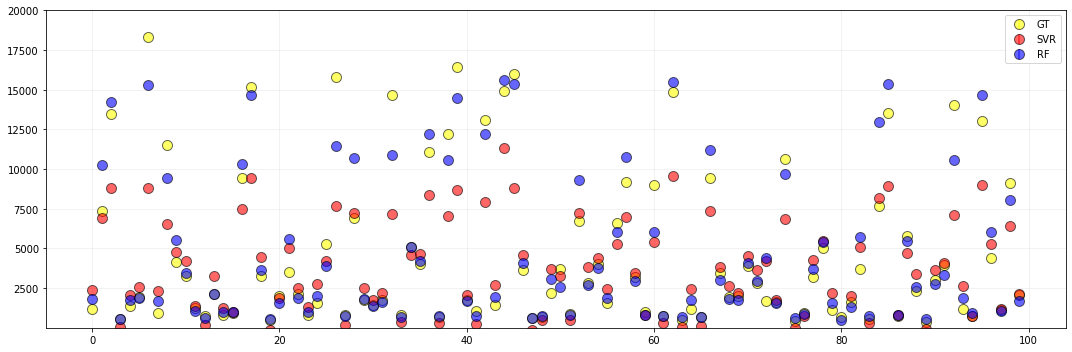

In [11]:
data_diamond = pd.read_csv("misc/diamonds.csv")
lis_est, lis_data, list_rmse = fit_score_regressions(data_diamond)

print ("rmse svr: ", list_rmse[0], " rmse rf: ", list_rmse[1])

x_Axis = range(lis_data[3].shape[0])
perm = np.random.permutation(x_Axis)[:100]


plt.figure(figsize=(15,5))

plt.errorbar(range(len(perm)), lis_data[3][perm], yerr=0, c= "yellow", alpha=0.6, markersize= 10, fmt='o',
             markeredgecolor="black" ,  label="GT")
plt.errorbar(range(len(perm)), lis_est[0].predict(lis_data[1])[perm], yerr=0, c= "red", alpha=0.6, markersize= 10, fmt='o',
             markeredgecolor="black" ,  label="SVR")
plt.errorbar(range(len(perm)), lis_est[1].predict(lis_data[1])[perm], yerr=0, c= "blue", alpha=0.6, markersize= 10, fmt='o',
             markeredgecolor="black" ,  label="RF")

plt.legend(['GT', 'SVR',  "RF"])
plt.ylim([0.4, 20000])
plt.tight_layout()
plt.grid(alpha=0.2)
plt.show()

#### <span style="color:#FFF; background-color:#080; font-weight:bold; padding:4px;">Importante</span> Evalue su respuesta.

In [12]:
!./run CHECK_SOLUTION PS3_5 $src5

2074.3100144179634 2074.3100144179634 1341.0441382269255 1344.5640896946143
evaluation result CORRECT


#### <span style="color:#FFF; background-color:#080; font-weight:bold; padding:4px;">Importante</span> Pasos Finales. 



#### 1. Reemplace la variable con su código de estudiante

In [ ]:
#Colaboratory
import urllib.parse, inspect
taller = urllib.parse.quote_plus("Taller_03_20201_ClassificationRegression")
codigo = urllib.parse.quote_plus("tl3_2180027")

#Virtualbox
#import urllib, inspect
#taller = urllib.quote_plus("Taller_03_20201_ClassificationRegression")
#codigo = urllib.quote_plus("tl3_12345")

print(taller, codigo)

Taller_03_20192_ClassificationRegression tl3_12345


#### 2. Guarde los cambios del taller:

In [ ]:
%%javascript
require(["base/js/namespace"],function(Jupyter) {
    Jupyter.notebook.save_checkpoint();
});

<IPython.core.display.Javascript object>

#### 3. Ejecute la siguiente celda y envíe el archivo comprimido

In [ ]:
!./convert_ipynb.sh $codigo $taller

uno: tl3_12345 dos Taller_03_20192_ClassificationRegression
¡PERFECTO!, el archivo   'tl3_12345.ipynb'   se creó correctamente :D


---
---
<img src="../imgs/bannerThanks.jpg" style="width:1000px;">